<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/EMM441_A3_S5_HookesLawVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hookes Law

## Aim

The inquiry starts by setting up a simple experiment. Hang a spring from a fixed point and attach various weights to it. With each weight, measure how much the spring stretches. Students observe the changes in the length of the spring as more weight is added.

Here are some questions to reflect on:

- What do you notice about the spring as the weight increases?
- Do you think there is a pattern in how the spring stretches with more weight?
- What might happen if we keep adding more weight?

This hands-on activity will help students visually interpret the relationship between weight (force) and spring extension.

## The Law

Hooke's Law: It is a principle of physics that states the force $ F $ needed to extend or compress a spring by some distance $ x $ scales linearly with respect to that distance. That is, $ F = kx $, where:
- $ F $ is the force applied to the spring, (The Independant Variable, IV)
- $ x $ is the extension or compression of the spring (how much it stretches or shrinks), (The Dependant Variable, DV)
- $ k $ is the spring constant that depends on the material and make of the spring. (The Control variable, k)

This law helps in understanding how much force is needed to stretch or compress various materials, which is useful in numerous engineering and scientific applications. (Which are?)

## The Function

Write the function $ F = kx $ down and explain each component:
- **F (Force)**: This is the total force applied to the spring. In our case, it's due to the weights hung from the spring. This can be measured in $ \text{Newtons} $ $( N )$ $( W = mg )$; weight force $W$ = mass $\text{kg} \times g$ $ \text{m/s}^2 $

- **x (Extension)**: This is how much the spring has stretched from its original length, measured in meters $(m)$.
- **k (Spring Constant)**: This is a constant for each spring, indicating how stiff the spring is. The higher the value of $ k $, the stiffer the spring, meaning it’s harder to stretch. This is measured in newtons per meter $(N/m)$.

Now, let's move to a Python code that will interactive exploration Hooke's Law by changing the spring constant $ k $ and the extension $ x $ to see how it affects the force $ F $.

## The Plot

The following Python code uses `ipywidgets` and `matplotlib` to create an interactive plot where students can adjust $ k $ and $ x $ using sliders and observe the resulting force $ F $:


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

def plot_hooke_law(k, x):
    F = k * x  # Calculate the force based on Hooke's Law
    plt.figure(figsize=(10, 5))
    plt.plot(x, F, 'ro')  # Plot the force vs extension as a red dot
    plt.xlim(0, 10)
    plt.ylim(0, 100)
    plt.xlabel('Extension (x) in meters')
    plt.ylabel('Force (F) in newtons')
    plt.title('Hooke\'s Law Demonstration: F = kx')
    plt.grid(True)
    plt.show()

# Create interactive sliders for spring constant and extension
interact(plot_hooke_law, k=(0.1, 10.0, 0.1), x=(0, 10, 0.1))

interactive(children=(FloatSlider(value=5.0, description='k', max=10.0, min=0.1), FloatSlider(value=5.0, descr…

<function __main__.plot_hooke_law(k, x)>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, Button, VBox, HBox, Textarea

# Default data points for extension (x values) and force (F values)
x_data = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
F_data = np.array([0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0])

# Function to plot the graph based on the provided data
def plot_hooke_law(k):
    plt.figure(figsize=(10, 5))
    plt.plot(x_data, F_data, 'bo-', label=f'Spring Constant k = {k:.1f} N/m')
    plt.xlim(0, max(x_data) + 1)
    plt.ylim(0, max(F_data) + 10)
    plt.xlabel('Extension (x) in meters')
    plt.ylabel('Force (F) in newtons')
    plt.title('Hooke\'s Law: F = kx')
    plt.legend()
    plt.grid(True)
    plt.show()

# Slider for adjusting the spring constant
k_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Spring Constant k')

# Text area for entering custom extension and force data
data_input = Textarea(
    value='0.0,0.0; 0.5,5.0; 1.0,10.0; 1.5,15.0; 2.0,20.0; 2.5,25.0; 3.0,30.0',
    placeholder='Enter pairs of extension and force values as x1,F1; x2,F2; ...',
    description='Data Pairs:',
    disabled=False
)

# Button to update data
update_button = Button(description='Update Data')

# Function to update data based on input
def update_data(b):
    global x_data, F_data
    try:
        # Split input string into pairs
        pairs = [pair.split(',') for pair in data_input.value.split(';')]
        # Convert pairs to numpy arrays
        x_data = np.array([float(pair[0]) for pair in pairs])
        F_data = np.array([float(pair[1]) for pair in pairs])
        plot_hooke_law(k_slider.value)  # Re-plot graph with new data
    except ValueError:
        print("Please enter valid comma-separated pairs of numbers.")

# Set the button's on_click function to update the data
update_button.on_click(update_data)

# Display widgets and initial plot
display(VBox([HBox([data_input, update_button]), k_slider]))
interact(plot_hooke_law, k=k_slider)


interactive(children=(FloatSlider(value=1.0, description='Spring Constant k', max=10.0, min=0.1), Output()), _…

<function __main__.plot_hooke_law(k)>

Let's modify the code to allow for a variable spring constant that changes as a function of the extension. This function could represent a more complex system like a shock cord with multiple components.

Here’s an example where the spring constant $ k $ varies as a quadratic function of the extension $ x $:

$$ k(x) = k_0 + k_1 x + k_2 x^2 $$

In this function:
- $ k_0 $ is the initial spring constant.
- $ k_1 $ and $ k_2 $ are coefficients that define how the spring constant changes with extension.


### Instructions:
1. **Data Input**: Enter pairs of extension and force values separated by commas and semicolons (e.g., `0.0,0.0; 0.5,5.0; 1.0,10.0; 1.5,15.0; 2.0,20.0; 2.5,25.0; 3.0,30.0`).
2. **Update Data**: Click the "Update Data" button to update the plot with the new data pairs.
3. **Adjust Spring Constant Coefficients**: Use the sliders to adjust the coefficients $ k_0 $, $ k_1 $, and $ k_2 $ and see how the plot updates accordingly.

This variation allows the spring constant to change as a function of the extension, simulating more complex behaviors such as those seen in shock cords, suspension systems or other nonlinear elastic materials.

interactive(children=(FloatSlider(value=1.0, description='k0', max=10.0, min=0.1), FloatSlider(value=0.0, desc…

<function __main__.plot_hooke_law(k0, k1, k2)>

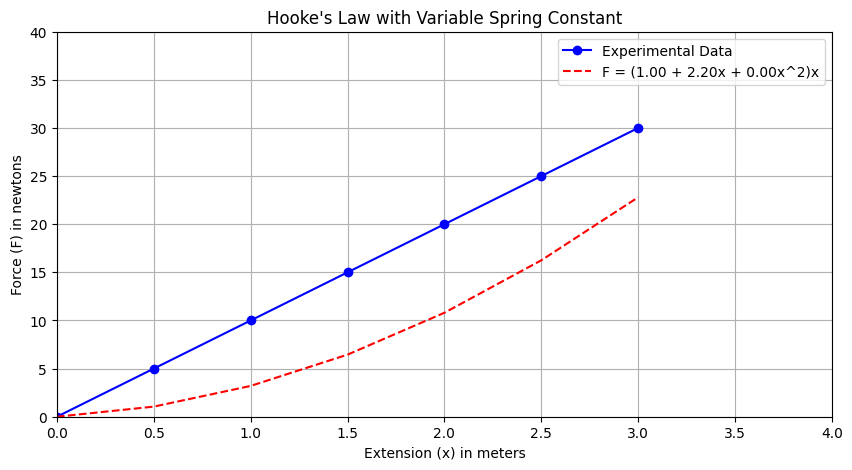

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, Button, VBox, HBox, Textarea

# Default data points for extension (x values) and force (F values)
x_data = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
F_data = np.array([0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0])

# Function to plot the graph based on the provided data and variable spring constant
def plot_hooke_law(k0, k1, k2):
    # Calculate force using the variable spring constant
    k_values = k0 + k1 * x_data + k2 * x_data**2
    F_calculated = k_values * x_data
    plt.figure(figsize=(10, 5))
    plt.plot(x_data, F_data, 'bo-', label='Experimental Data')
    plt.plot(x_data, F_calculated, 'r--', label=f'F = ({k0:.2f} + {k1:.2f}x + {k2:.2f}x^2)x')
    plt.xlim(0, max(x_data) + 1)
    plt.ylim(0, max(max(F_data), max(F_calculated)) + 10)
    plt.xlabel('Extension (x) in meters')
    plt.ylabel('Force (F) in newtons')
    plt.title('Hooke\'s Law with Variable Spring Constant')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sliders for adjusting the coefficients of the spring constant function
k0_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='k0')
k1_slider = FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='k1')
k2_slider = FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='k2')

# Text area for entering custom extension and force data
data_input = Textarea(
    value='0.0,0.0; 0.5,5.0; 1.0,10.0; 1.5,15.0; 2.0,20.0; 2.5,25.0; 3.0,30.0',
    placeholder='Enter pairs of extension and force values as x1,F1; x2,F2; ...',
    description='Data Pairs:',
    disabled=False
)

# Button to update data
update_button = Button(description='Update Data')

# Function to update data based on input
def update_data(b):
    global x_data, F_data
    try:
        # Split input string into pairs
        pairs = [pair.split(',') for pair in data_input.value.split(';')]
        # Convert pairs to numpy arrays
        x_data = np.array([float(pair[0]) for pair in pairs])
        F_data = np.array([float(pair[1]) for pair in pairs])
        plot_hooke_law(k0_slider.value, k1_slider.value, k2_slider.value)  # Re-plot graph with new data
    except ValueError:
        print("Please enter valid comma-separated pairs of numbers.")

# Set the button's on_click function to update the data
update_button.on_click(update_data)

# Display widgets and initial plot
display(VBox([HBox([data_input, update_button]), k0_slider, k1_slider, k2_slider]))
interact(plot_hooke_law, k0=k0_slider, k1=k1_slider, k2=k2_slider)
